In [1]:
import pandas as pd
import numpy as np
import os
from os.path import join, pardir

## Plot distribution

In [2]:
DATA_DIR = join(pardir, pardir, 'data', 'write_new_algorithm')
dfs = []
import ast
# lock atomic commit push rest
#barplot_data = [[],[],[],[],[]]
#barplot_stds = [[],[],[],[],[],[]]
#for size in [4, 1024, 65536, 131072, 256000]:


full_data = []
for size in [4, 1024, 65536, 131072, 256000]:
    
    for memory in [512, 1024, 2048]:
    #for memory in [512]:
        
        with open(join(DATA_DIR, f'persistent_{size}_{memory}.timings')) as in_f:
                  
            writer = False
            for line in in_f:
                
                #print(line.split(':')[2])
                key = line.split(':')[1].split()[0].strip()
                if key == 'total':
                    key = f'{key}_writer' if not writer else f'{key}_distributor'
                    writer = True
                data = ast.literal_eval(line.split(':')[2])
                for val in data:
                    full_data.append([int(size), int(memory), key, val])
        

timings_df = pd.DataFrame(data=full_data, columns=['size', 'memory', 'key', 'value']) 
timings_df['value'] *= 1000
print(timings_df['key'].unique())
#size = 4
#memory = 512
#df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_summary.csv'),index_col=None)
#df['size'] = size / 1024.0
#df['value'] *= 1000.0
#df['value'] /= df['repetitions']
#print(df.loc[(df['memory'] == memory) & (df['function'] == 'writer')])

#barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
#barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
#barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
#barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
#total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
#barplot_data[4].append(
#    total
#    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
#)
barplot_data_writer = [[],[],[],[]]


for size in [4, 65536, 256000]:
    
    for memory in [512, 2048]:
        
        barplot_data_writer[0].append(
            timings_df.loc[(timings_df['memory'] == memory) & (timings_df['size'] == size) & (timings_df['key'] == 'lock')]['value'].median()
        )
        barplot_data_writer[1].append(timings_df.loc[(timings_df['memory'] == memory) & (timings_df['size'] == size)& (timings_df['key'] == 'commit')]['value'].median())
        barplot_data_writer[2].append(timings_df.loc[(timings_df['memory'] == memory) & (timings_df['size'] == size)& (timings_df['key'] == 'push')]['value'].median())

        total = timings_df.loc[(timings_df['memory'] == memory) & (timings_df['size'] == size)& (timings_df['key'] == 'total_writer')]['value'].median()
        #print(total)
        barplot_data_writer[3].append(
            total
            - barplot_data_writer[0][-1] - barplot_data_writer[1][-1] - barplot_data_writer[2][-1]
        )
        
barplot_data_distributor = [[],[],[],[],[]]


for size in [4, 65536, 256000]:
    
    for memory in [512, 2048]:
        
        barplot_data_distributor[0].append(
            timings_df.loc[(timings_df['memory'] == memory) & (timings_df['size'] == size) & (timings_df['key'] == 'exec_read')]['value'].median()
            + timings_df.loc[(timings_df['memory'] == memory) & (timings_df['size'] == size) & (timings_df['key'] == 'exec_update')]['value'].median()
        )
        #barplot_data_distributor[1].append(
        #    timings_df.loc[(timings_df['memory'] == memory) & (timings_df['size'] == size) & (timings_df['key'] == 'exec_update')]['value'].median()
        #)
        barplot_data_distributor[1].append(
            timings_df.loc[(timings_df['memory'] == memory) & (timings_df['size'] == size) & (timings_df['key'] == 'exec_pop_updates')]['value'].median()
        )
        barplot_data_distributor[2].append(timings_df.loc[(timings_df['memory'] == memory) & (timings_df['size'] == size)& (timings_df['key'] == 'watch_query')]['value'].median())
        barplot_data_distributor[3].append(timings_df.loc[(timings_df['memory'] == memory) & (timings_df['size'] == size)& (timings_df['key'] == 'notify')]['value'].median())

        total = timings_df.loc[(timings_df['memory'] == memory) & (timings_df['size'] == size)& (timings_df['key'] == 'total_distributor')]['value'].median()
        #print(total)
        barplot_data_distributor[4].append(
            total
            - barplot_data_distributor[0][-1] - barplot_data_distributor[1][-1] - barplot_data_distributor[2][-1] - barplot_data_distributor[3][-1]
        )

['lock' 'push' 'commit' 'total_writer' 'parse' 'write' 'watch_query'
 'notify' 'watch_notify' 'total_distributor' 'exec_read' 'exec_update'
 'exec_pop_updates']


[9.252190589904785, 8.016109466552734, 7.154583930969238, 7.843971252441406, 9.09268856048584, 8.359432220458984]
[8.596658706665039, 7.932901382446289, 7.121801376342773, 7.674574851989746, 7.555723190307617, 8.585929870605469]
[13.515353202819824, 13.349533081054688, 52.80601978302002, 27.72808074951172, 189.34237957000732, 72.18217849731445]
[1.1459589004516602, 0.5167722702026367, 0.6235837936401367, 0.662684440612793, 5.452752113342285, 1.6455650329589844]


/tmp/ipykernel_1077566/4015982630.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


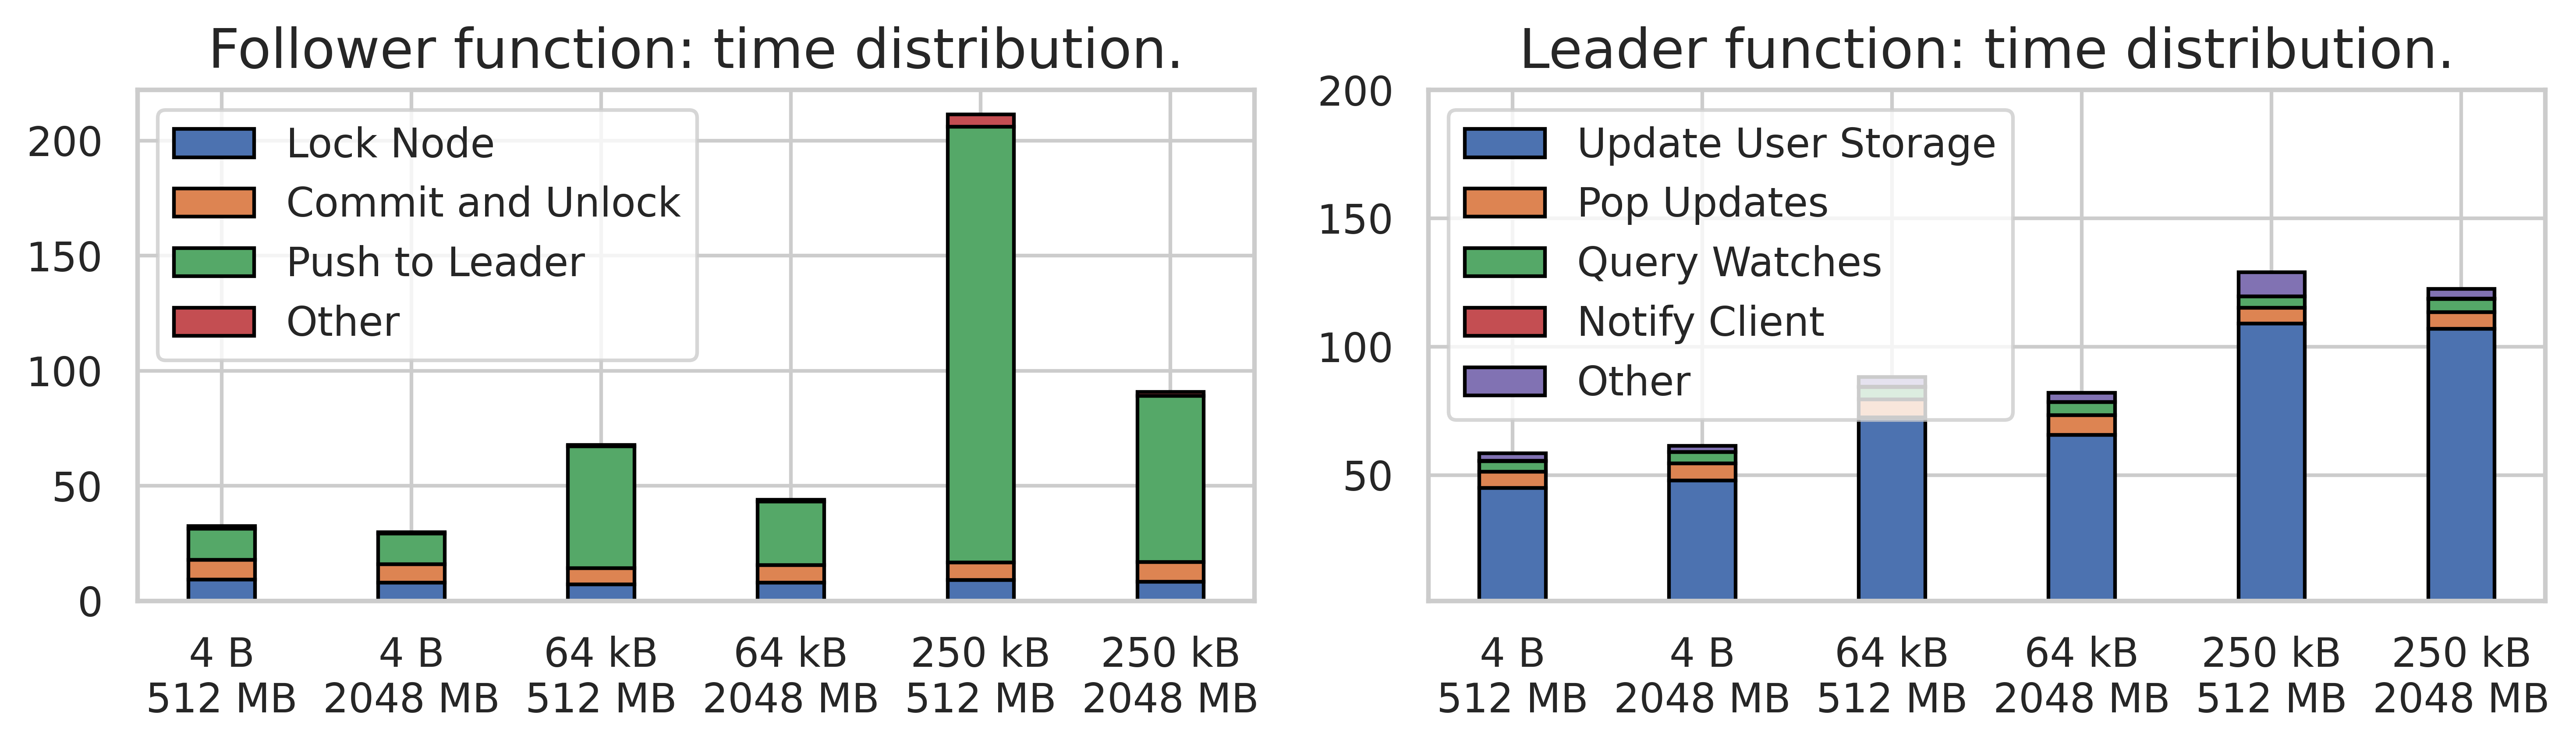

In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from os.path import join, pardir
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

DATA_DIR = join(pardir, pardir, 'data', 'read')

#sns.set(rc={'figure.figsize':(16,8)})
sns.set(rc={'figure.figsize':(10,3)})
sns.set_style("whitegrid")

fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(1,4)
barplot = fig3.add_subplot(gs[0,0:2])
barplot_distr = fig3.add_subplot(gs[0,2:4])

width = 0.35       # the width of the bars: can also be len(x) sequence
sum_ = [0,0,0,0,0,0]
labels = ['4 B\n512 MB', '4 B\n2048 MB', '64 kB\n512 MB', '64 kB\n2048 MB', '250 kB\n512 MB', '250 kB\n2048 MB']
for id, col in enumerate(['Lock Node', 'Commit and Unlock', 'Push to Leader', 'Other']):

    print(barplot_data_writer[id])
    barplot.bar(labels, barplot_data_writer[id], width, label=col, bottom=sum_, edgecolor='black')
    sum_ = np.add(sum_, barplot_data_writer[id])
barplot.legend()

barplot.set_title('Follower function: time distribution.', fontsize=15)


width = 0.35       # the width of the bars: can also be len(x) sequence
sum_ = [0,0,0,0,0,0]
labels = ['4 B\n512 MB', '4 B\n2048 MB', '64 kB\n512 MB', '64 kB\n2048 MB', '250 kB\n512 MB', '250 kB\n2048 MB']
for id, col in enumerate(['Update User Storage', 'Pop Updates', 'Query Watches', 'Notify Client', 'Other']):

    #print(barplot_data[id])
    barplot_distr.bar(labels, barplot_data_distributor[id], width, label=col, bottom=sum_, edgecolor='black')
    sum_ = np.add(sum_, barplot_data_distributor[id])
barplot_distr.legend(loc='upper left')
barplot_distr.set_ylim(1, 200)

barplot_distr.set_title('Leader function: time distribution.', fontsize=15)

plt.rcParams['figure.dpi'] = 600
plt.tight_layout()


plt.savefig("presentation_write_distribution_aws.png",bbox_inches='tight',pad_inches = 0, transparent=False)

In [14]:
barplot.patches[6].get_x()

-0.175

## Write

In [24]:

DATA_DIR = join(pardir, pardir, 'data', 'write_new_algorithm')
DATA_DIR_ZK = join(pardir, pardir, 'data', 'write_zookeeper')

dfs = []
dfs2 = []
for mem in [512, 1024, 2048]:
    
    for size in [4, 1024, 65536, 131072, 256000]:
        df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}_processed.csv'), index_col=0)
        df['size'] = size / 1024
        
        #print(df)
        # data is broken :-(
        #df = df.loc[df['memory'] == mem]
        #df = df.groupby(['memory', 'function']).head(150).reset_index(drop=True)
        #if df.shape[0] > 200:
        #    print(size, mem)
        dfs.append(df)
        
        
        zk = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}_processed.csv'), index_col=0)
        
        
        df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}.csv'), index_col=0)
        #df = df.groupby(['memory', 'size']).head(100).reset_index(drop=True)
        df['size'] = size / 1024
        df['data'] /= 1000.0
        #df.loc[df['op'] == 'set_data', 'data'] /= 1000
        dfs2.append(df)

for size in [4, 1024, 65536, 131072, 256000]:
    df = pd.read_csv(join(DATA_DIR_ZK, f'interregion_{size}.csv'), index_col=0)
    df['data'] /= 1000.0
    df['size'] /= 1024.0
    df['memory'] = 'ZooKeeper'
    dfs2.append(df)

        
dynamo_df = pd.concat(dfs)
dynamo_df['system'] = 'persistent'
dynamo_df_client = pd.concat(dfs2)
dynamo_df_client['system'] = 'persistent'

In [20]:

dfs2 = []
DATA_DIR_ZK = join(pardir, pardir, 'data', 'write_zookeeper')
for size in [4, 1024, 65536, 131072, 256000]:
    df = pd.read_csv(join(DATA_DIR_ZK, f'interregion_{size}.csv'), index_col=0)
    df['data'] /= 1000.0
    df['size'] /= 1024.0
    df['memory'] = 'ZooKeeper'
    dfs2.append(df)

dynamo_df_client = pd.concat(dfs2)
dynamo_df_client['system'] = 'persistent'

In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from os.path import join, pardir
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

DATA_DIR = join(pardir, pardir, 'data', 'read')

#sns.set(rc={'figure.figsize':(16,8)})
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("whitegrid")

/tmp/ipykernel_1077566/3806554443.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )


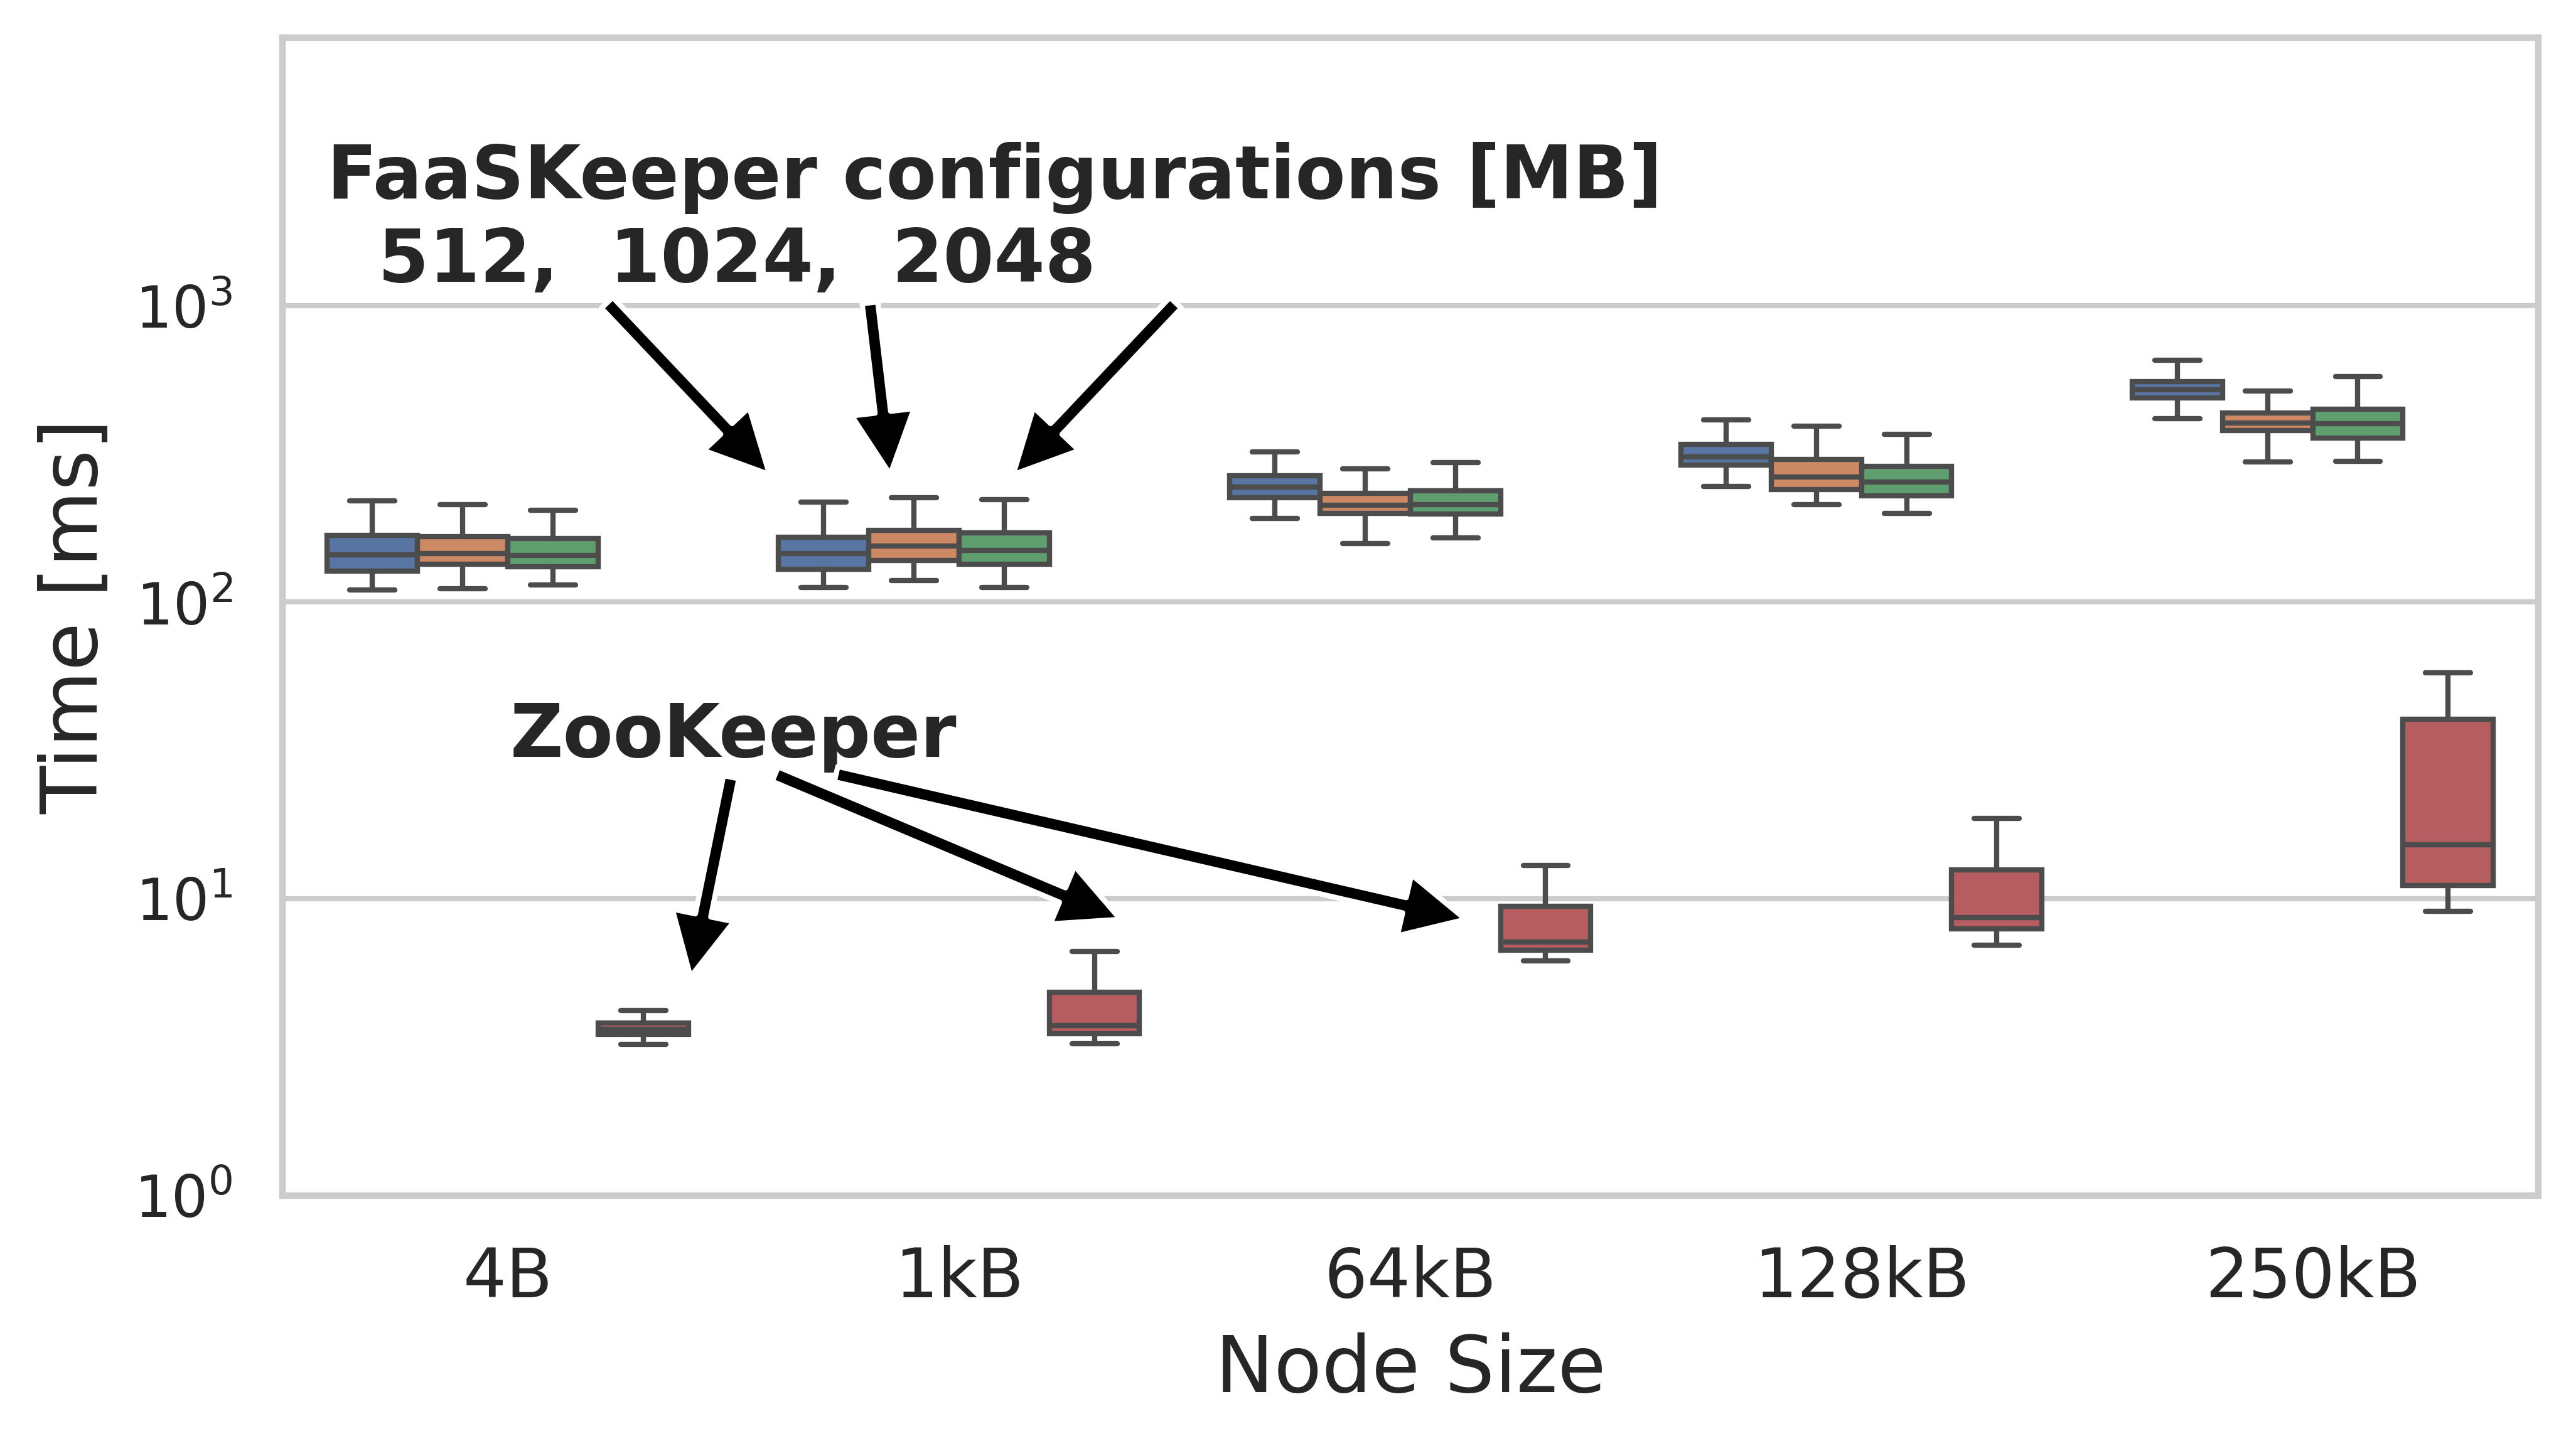

In [62]:

g = sns.boxplot(x="size", y="data",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df_client.loc[dynamo_df_client['op']=='set_data'],showfliers=False)
handles, labels = g.get_legend_handles_labels()

g.legend(handles, ['512 MB', '1024 MB', '2048 MB', 'ZooKeeper'], loc='upper left',ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )
g.set_xlabel('Node Size',fontsize=15)
g.set_ylabel('Time [ms]',fontsize=15)
#g.set_title('Write time: FaaSKeeper and ZooKeeper.', fontsize=15)
g.set_yscale('log')
g.set_ylim(1, 8000)
g.legend().set_visible(False)
g.tick_params(axis='x', labelsize=13)

for i in range(20):
    #print(i)
    g.patches[i].set_visible(False)

for i in range(0,100):
    g.lines[i].set_visible(False)
plt.rcParams['figure.dpi'] = 600
plt.tight_layout()
plt.savefig("fk_write_performance_empty.png",bbox_inches='tight',pad_inches = 0, transparent=False)


#g.annotate('Functions: 512 MB, 1024 MB\nand 2048 MB.',
#            xy=(0.7, 250), xytext=(0, 1000), fontsize=12, fontweight='bold',
#            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='left')
g.annotate('FaaSKeeper configurations [MB]\n  512,  1024,  2048', fontweight='bold',
            xy=(0, 1000), xytext=(-0.4, 1200), fontsize=14, ha='left')
g.annotate('',
            xy=(0.85, 250), xytext=(0.8, 1100), fontsize=14, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1.1, 250), xytext=(1.5, 1100), fontsize=14, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(0.6, 250), xytext=(0.2, 1100), fontsize=14, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')

for i in range(15):
    #print(i)
    g.patches[i].set_visible(True)

for i in range(0,75):
    g.lines[i].set_visible(True)

plt.rcParams['figure.dpi'] = 600
plt.tight_layout()
plt.savefig("fk_write_performance_fk.png",bbox_inches='tight',pad_inches = 0, transparent=False)


g.annotate('ZooKeeper', fontweight='bold',
            xy=(0, 1000), xytext=(0.5, 30), fontsize=14, ha='center')
g.annotate('',
            xy=(0.4, 5), xytext=(0.5, 28), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1.4, 8), xytext=(0.55, 28), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(2.2, 8), xytext=(0.65, 28), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')

for i in range(5):
    #print(i)
    g.patches[15+i].set_visible(True)

for i in range(75,100):
    g.lines[i].set_visible(True)

plt.savefig("fk_write_performance_full.png",bbox_inches='tight',pad_inches = 0, transparent=False)


In [50]:
g.lines

<Axes.ArtistList of 100 lines>